Evaluating matplotlib. Trying to learn the fundamentals of this graphing library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 100)

In [31]:
df = pd.read_csv('nba_data.csv', index_col=0)
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [32]:
df['year_start'] = pd.to_numeric(df['season'].str.slice(stop=4))

In [33]:
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
year_start             int64
dtype: object

In [34]:
df_2010_after =\
    df.query('year_start >= 2010 and gp > 20')\
    .reset_index(drop=True)

In [35]:
df_2010_after.year_start.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [36]:
df_2010_after['draft_number'] = pd.to_numeric(df_2010_after['draft_number'], errors='coerce')

Let's see usage percentage and points with more than 20 games played

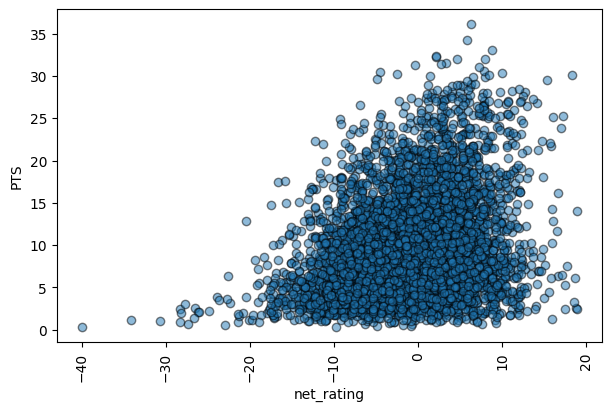

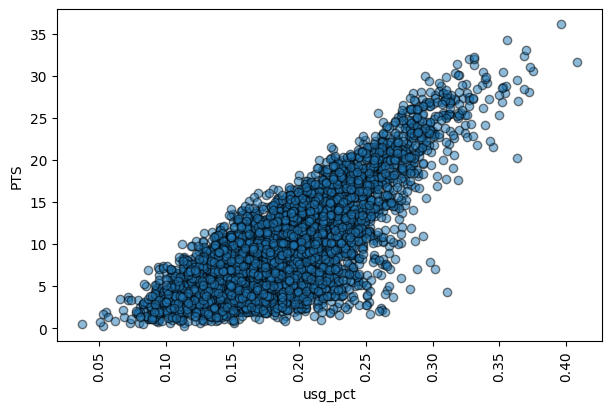

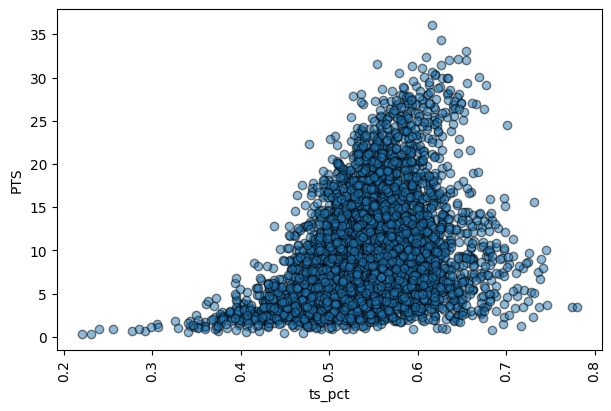

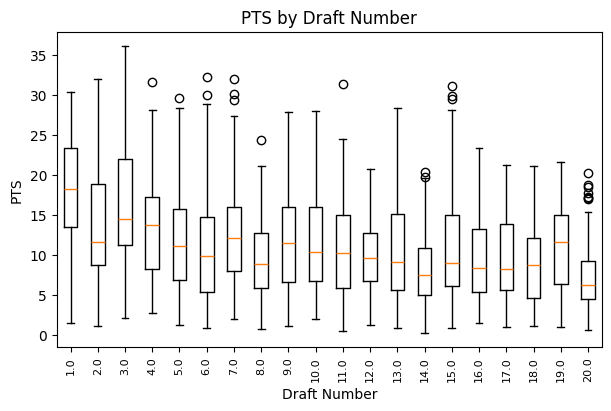

In [37]:
x_feats = ['net_rating', 'usg_pct', 'ts_pct', 'draft_number']

for counter, feat in enumerate(x_feats):
    if feat != 'draft_number':
        fig, ax = plt.subplots(figsize = [6,4], layout='constrained')
        ax.scatter(x=df_2010_after[feat], y=df_2010_after['pts'], edgecolor='k', alpha=0.5)
        ax.set_xlabel(feat)
        ax.set_ylabel('PTS')
        plt.xticks(rotation = 90)
        plt.show()
    else:
        cats = np.sort(
            df_2010_after.query('draft_number <= 20')\
                ['draft_number']\
                .unique()
            )
        fig, ax = plt.subplots(figsize = [6,4], layout = 'constrained')
        ax.boxplot([df_2010_after[df_2010_after['draft_number'] == cat]['pts'] for cat in cats], tick_labels = cats)
        plt.xticks(rotation = 90, fontsize = 8)
        ax.set_title('PTS by Draft Number')
        ax.set_xlabel('Draft Number')
        ax.set_ylabel('PTS')

Let's draw a line for pts vs usg_pct

As a function

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

def plot_regression(df, x_col, y_col, xlabel=None, ylabel=None):
    # Extract data from DataFrame
    x = df[x_col].values
    y = df[y_col].values
    
    # Use column names as default labels if not provided
    xlabel = xlabel if xlabel is not None else x_col
    ylabel = ylabel if ylabel is not None else y_col
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Scatter plot
    ax.scatter(x, y, alpha=0.5, edgecolor='k')
    
    # Calculate regression line
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Sort x and corresponding y_pred for plotting
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    # Plot regression line
    ax.plot(x_sorted, y_pred_sorted, 'r-', 
            label='y = {:.2f}x + {:.2f}\nR² = {:.2f}'.format(slope, intercept, r2))
    
    # Customize plot
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_regression(df, 'feature1', 'feature2')

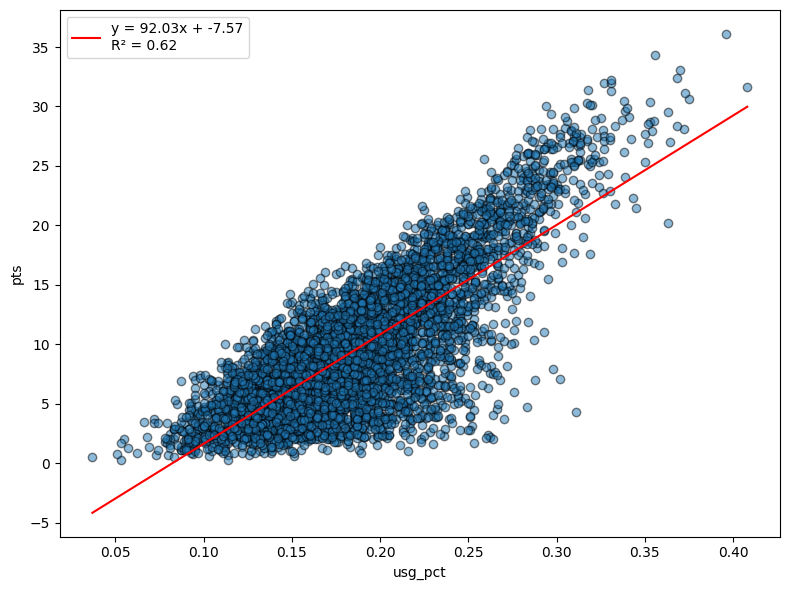

In [63]:
plot_regression(df_2010_after, 'usg_pct', 'pts')